# Demo training

## Environment:
1. CUDA 11.0
2. GCC 7.5
3. torch 1.7.1+cu110
4. torchvision 0.8.2+cu110
5. Comet ML 3.9.0
6. OpenCV: 4.1.2
7. MMCV: 1.3.1
8. MMDetection: 2.11.0+187774b
9. COMET_DISABLE_AUTO_LOGGING=1

## Setting up the environment

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
"""
import os
os.environ['COMET_DISABLE_AUTO_LOGGING'] = '1'
"""

In [ ]:
!pip install comet_ml --upgrade --quiet

     |████████████████████████████████| 266kB 6.5MB/s 
     |████████████████████████████████| 522kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 


In [ ]:
import comet_ml

In [ ]:
# !pip install -U torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.3MB/s eta 0:04:01tcmalloc: large alloc 1147494400 bytes == 0x55bbc7f80000 @  0x7ff042c5b615 0x55bb8ef1d06c 0x55bb8effceba 0x55bb8ef1fe8d 0x55bb8f01199d 0x55bb8ef93fe9 0x55bb8ef8eb0e 0x55bb8ef2177a 0x55bb8ef93e50 0x55bb8ef8eb0e 0x55bb8ef2177a 0x55bb8ef9086a 0x55bb8f0127c6 0x55bb8ef8fee2 0x55bb8f0127c6 0x55bb8ef8fee2 0x55bb8f0127c6 0x55bb8ef8fee2 0x55bb8f0127c6 0x55bb8f094431 0x55bb8eff5049 0x55bb8ef5fc84 0x55bb8ef208e9 0x55bb8ef94ade 0x55bb8ef2169a 0x55bb8ef8fa45 0x55bb8ef8ee0d 0x55bb8ef2177a 0x55bb8ef8fa45 0x55bb8ef2169a 0x55bb8ef8fa45
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:22tcmalloc: large alloc 1434370048 bytes == 0x55bc0c5d6000 @  0x7ff042c5b615 0x55bb8ef1d06c 0x55bb8effceba 0x55bb8ef1fe8d 0x55bb8f01199d 0x55bb8ef93fe9 0x55bb8ef8eb0e 0x55bb8ef2177a 0x55bb8ef93e50 0x55bb8ef8eb0e 0x55bb8ef2177a 0x55bb8ef9086a 0x55bb8f0127c6 0x55bb8ef8fee2 0

In [ ]:
# Check Pytorch installation
import torch, torchvision

print(torch.__version__, torch.cuda.is_available())

1.7.1+cu110 True


In [ ]:
# install mmcv-full thus we could use CUDA operators
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.1/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.1/index.html
     |████████████████████████████████| 266kB 5.2MB/s 
     |████████████████████████████████| 194kB 9.3MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.1-cp37-cp37m-linux_x86_64.whl size=21416786 sha256=ca0682463b8d4973a0345afac0650f5592ded947a31a35a625e547e64757546b
  Stored in directory: /root/.cache/pip/wheels/75/40/57/0825abf01599edf55ba2a23444af249e79205dc0572786418d
Successfully built mmcv-full


In [ ]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print(get_compiling_cuda_version())
print(get_compiler_version())

11.0
GCC 7.5


In [ ]:
"""
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0
"""

Cloning into 'mmdetection'...
remote: Enumerating objects: 16902, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16902 (delta 29), reused 55 (delta 21), pack-reused 16806
Receiving objects: 100% (16902/16902), 20.32 MiB | 32.20 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=cab2b9d49e8cc517d53afe98caebc17d4c93e70d5a1ffd25176220507406a9b2
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
  Running setup.py develop for mmdet
     |████████████████████████████████| 2.1MB 5.1MB/s 
ERROR: bokeh 2.3.1 has requirement pillow>=7.1.0, but you'll have pillow 7.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have img

In [ ]:
# Check MMDetection installation
import mmdet

print(mmdet.__version__)

2.11.0


## Getting the data

In [ ]:
# !wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2021-04-16 11:41:48--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  28.3MB/s    in 27s     

2021-04-16 11:42:16 (27.8 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



In [ ]:
# !tar -xf images.tar.gz

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

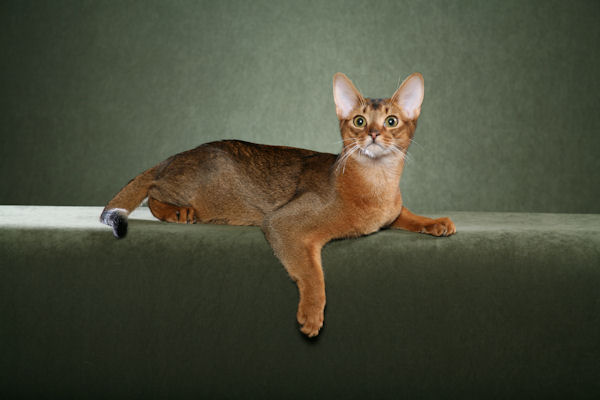

In [ ]:
Image.open('images/Abyssinian_1.jpg')

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


We have data already converted to the COCO format.

In [ ]:
# !cp "/content/drive/My Drive/pets-train-coco-format.json" pets-train-coco-format.json

In [ ]:
# !cp "/content/drive/My Drive/pets-test-coco-format.json" pets-test-coco-format.json

## Creating a config

In [ ]:
"""
!mkdir checkpoints
!wget -c https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
"""

--2021-04-16 11:42:56--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.56.19
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.56.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/x-www-form-urlencoded]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  18.1MB/s    in 11s     

2021-04-16 11:43:08 (15.5 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [ ]:
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

In [ ]:
%%writefile mmdet/core/utils/comet_logger_hook.py
from mmcv.runner import HOOKS, master_only
from mmcv.runner.hooks import LoggerHook


@HOOKS.register_module()
class CometMLLoggerHook(LoggerHook):

    def __init__(self,
                 project_name=None,
                 hyper_params=None,
                 import_comet=True,
                 interval=10,
                 ignore_last=True,
                 reset_flag=True,
                 by_epoch=True,
                 api_key=None):
        """Class to log metrics to Comet ML.
        It requires `comet_ml` to be installed.
        Args:
            project_name (str, optional):
                Send your experiment to a specific project. 
                Otherwise will be sent to Uncategorized Experiments. 
                If project name does not already exists Comet.ml will create 
                a new project.
            hyper_params (dict, optional): Logs a dictionary 
                (or dictionary-like object) of multiple parameters.
            import_comet (bool optional): Whether to import comet_ml before run.
                WARNING: Comet ML have to be imported before sklearn and torch,
                or COMET_DISABLE_AUTO_LOGGING have to be set in the environment.
            interval (int): Logging interval (every k iterations).
            ignore_last (bool): Ignore the log of last iterations in each epoch
                if less than `interval`.
            reset_flag (bool): Whether to clear the output buffer after logging
            by_epoch (bool): Whether EpochBasedRunner is used.
        """
        super(CometMLLoggerHook, self).__init__(interval, ignore_last,
                                                reset_flag, by_epoch)
        self._import_comet = import_comet
        if import_comet:
            self.import_comet()
        self.project_name = project_name
        self.hyper_params = hyper_params
        self._api_key = api_key

    def import_comet(self):
        try:
            import comet_ml
        except ImportError:
            raise ImportError(
                'Please run "pip install comet_ml" to install Comet ML')
        self.comet_ml = comet_ml

    @master_only
    def before_run(self, runner):
        if self._import_comet:
            self.experiment = self.comet_ml.Experiment(
                api_key=self._api_key,
                project_name=self.project_name,
            )
        else:
            self.experiment = comet_ml.Experiment(
                api_key=self._api_key,
                project_name=self.project_name,
            )
        if self.hyper_params is not None:
            self.experiment.log_parameters(self.hyper_params)

    @master_only
    def log(self, runner):
        tags = self.get_loggable_tags(runner, allow_text=True)
        for tag, val in tags.items():
            self.experiment.log_metric(name=tag,
                                       value=val,
                                       step=self.get_iter(runner),
                                       epoch=self.get_epoch(runner))

    @master_only
    def after_run(self, runner):
        self.experiment.end()

Writing mmdet/core/utils/comet_logger_hook.py


In [ ]:
_base_ = './configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_coco.py'

In [ ]:
from mmcv import Config
from mmdet.apis import set_random_seed

cfg = Config.fromfile(_base_)

In [ ]:
classes = (
    'Abyssinian',
    'american_bulldog',
    'american_pit_bull_terrier',
    'basset_hound',
    'beagle',
    'Bengal',
    'Birman',
    'Bombay',
    'boxer',
    'British_Shorthair',
    'chihuahua',
    'Egyptian_Mau',
    'english_cocker_spaniel',
    'english_setter',
    'german_shorthaired',
    'great_pyrenees',
    'havanese',
    'japanese_chin',
    'keeshond',
    'leonberger',
    'Maine_Coon',
    'miniature_pinscher',
    'newfoundland',
    'Persian',
    'pomeranian',
    'pug',
    'Ragdoll',
    'Russian_Blue',
    'saint_bernard',
    'samoyed',
    'scottish_terrier',
    'shiba_inu',
    'Siamese',
    'Sphynx',
    'staffordshire_bull_terrier',
    'wheaten_terrier',
    'yorkshire_terrier',
)

In [ ]:
cfg.model.roi_head.bbox_head.num_classes = 37
cfg.model.roi_head.mask_head.num_classes = 37

cfg.data.train.img_prefix = 'images/'
cfg.data.train.classes = classes
cfg.data.train.ann_file = 'pets-train-coco-format.json'

cfg.data.val.img_prefix = 'images/'
cfg.data.val.classes = classes
cfg.data.val.ann_file = 'pets-test-coco-format.json'

cfg.data.test.img_prefix = 'images/'
cfg.data.test.classes = classes
cfg.data.test.ann_file = 'pets-test-coco-format.json'

cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

cfg.log_config.interval = 25
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='CometMLLoggerHook', api_key='your_api_key')
]

cfg.custom_imports = dict(imports=['mmdet.core.utils.comet_logger_hook'],
                          allow_failed_imports=False)

In [ ]:
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='MaskRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_

In [ ]:
cfg.dump('mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets.py')

## Running the training

In [ ]:
!python tools/train.py mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets.py

2021-04-16 11:44:08,036 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, Feb 20 2021, 21:17:23) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.7.1+cu110
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.6.0 (Git Hash 5ef631a030a6f73131c77892041042805a06064f)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.0
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,

## Testing the model

In [ ]:
!python tools/test.py mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets.py work_dirs/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets/latest.pth --eval bbox segm

loading annotations into memory...
Done (t=0.93s)
creating index...
index created!
Use load_from_local loader
[>>] 3662/3662, 5.9 task/s, elapsed: 617s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.54s).
Accumulating evaluation results...
DONE (t=1.31s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.687
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.618
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.794
 Average Recall     (AR) @[ IoU=0.50:0

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

In [ ]:
model = init_detector(
    'mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets.py',
    'work_dirs/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_pets/latest.pth',
    device='cuda:0')

Use load_from_local loader


In [ ]:
img = 'images/Russian_Blue_201.jpg'
result = inference_detector(model, img)

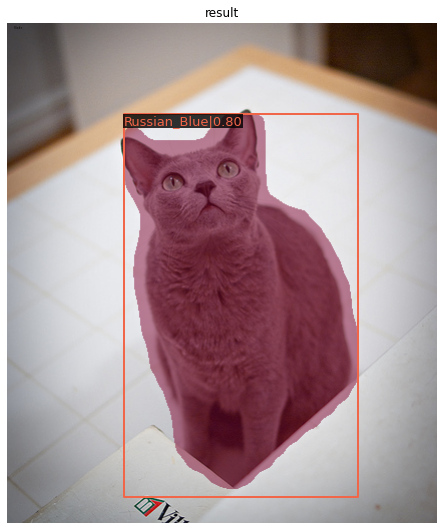

In [ ]:
show_result_pyplot(model, img, result)

### Our own test pictures

In [ ]:
!cp "/content/drive/My Drive/test5.jpg" test5.jpg

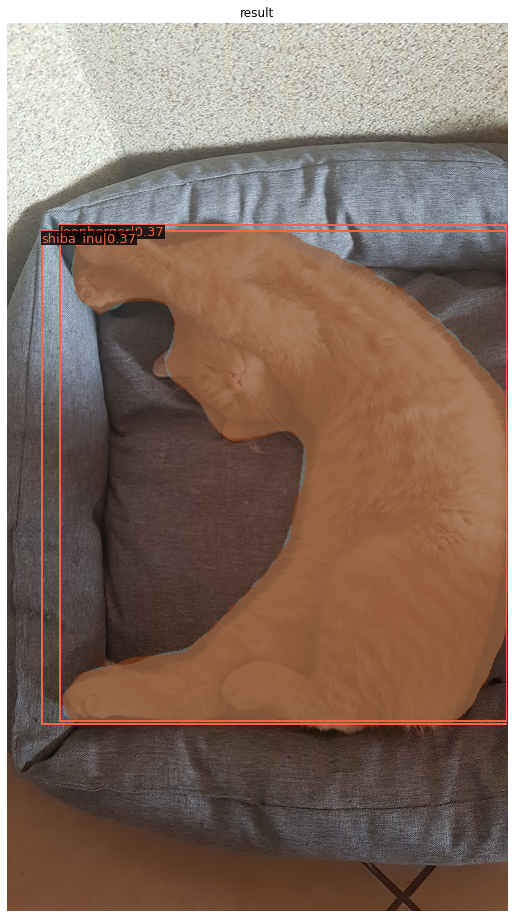

In [ ]:
img = 'test1.jpg'
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

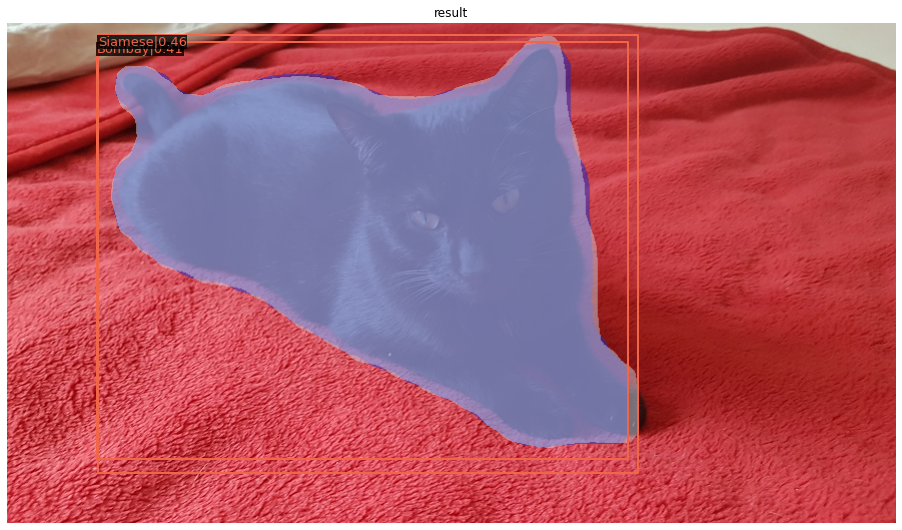

In [ ]:
img = 'test3.jpg'
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

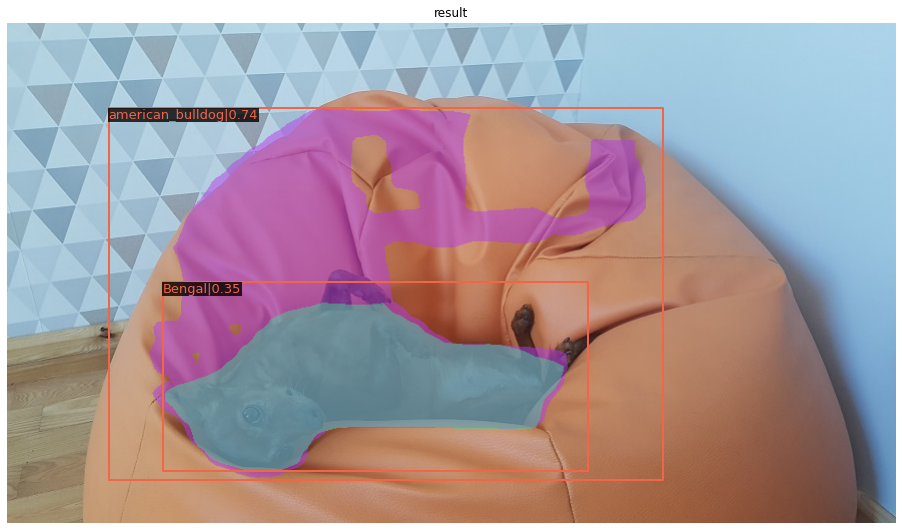

In [ ]:
img = 'test4.jpg'
result = inference_detector(model, img)
show_result_pyplot(model, img, result)